In [50]:
#Importing libraries 
import tweepy           # To consume Twitter's API
from tweepy import OAuthHandler
import pandas as pd     # To handle data
import numpy as np      # For number computing
import re
from textblob import TextBlob # To help with textual analysis
import json


In [51]:
bringfamiliestogether= pd.read_csv('C:/Users/shabnaz/Documents/BDA 102/BringFamiliesTogether.csv')

In [52]:
bringfamiliestogether.head(10) #Checking the 1st 10 rows 

,Unnamed: 0,created_at,favorite_count,favorited,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,possibly_sensitive,retweet_count,retweeted,source,text,truncated,name,screen_name,location,description
0,0,2018-06-25 21:45,0,False,1.011360e+18,9.069180e+17,NaN,NaN,NaN,NaN,...,0.0,0,False,"<a href=""http://twitter.com/#!/download/ipad"" ...","Trump is STILL holding 2,300 kids as hostages ...",True,Dubs Hart,DubsHart,Cumbria,Sharing in the hope of a better World #RJCOB
1,1,2018-06-25 21:45,0,False,1.011360e+18,9.385330e+17,NaN,NaN,NaN,NaN,...,0.0,0,False,"<a href=""http://resist.bot"" rel=""nofollow"">RB ...",Here’s an open letter from Cheryle in West Che...,False,Resistbot Open Letters,openletterbot,United States,Real letters delivered to Congress and state g...
2,2,2018-06-25 21:44,0,False,1.011360e+18,1.741491e+07,NaN,NaN,NaN,NaN,...,0.0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The takeaway: 41 percent of Americans are hear...,False,Patrick White,whitepatrick,"iPhone: 41.120196,-95.915053",I'm a writer/producer and musician based in Om...
3,3,2018-06-25 21:44,0,False,1.011360e+18,9.385330e+17,NaN,NaN,NaN,NaN,...,0.0,0,False,"<a href=""http://resist.bot"" rel=""nofollow"">RB ...",Here’s an open letter from Cheryle in West Che...,False,Resistbot Open Letters,openletterbot,United States,Real letters delivered to Congress and state g...
4,4,2018-06-25 21:44,0,False,1.011360e+18,1.374219e+07,NaN,NaN,NaN,NaN,...,0.0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",We don't have to sit around feeling helpless. ...,True,SandraL #AbolishICE,SandraL,NaN,"Geek mom, singer, lover of British TV. I post ..."
5,5,2018-06-25 21:44,0,False,1.011360e+18,9.048500e+17,SenCortezMasto,1.010000e+18,1.010000e+18,8.110000e+17,...,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@SenCortezMasto They didn’t know that we’re fi...,True,Bella Soul,fashionfunfemme,NaN,Kindness is NOT Weakness!
6,6,2018-06-25 21:44,0,False,1.011360e+18,1.728928e+09,JoyAnnReid,1.010000e+18,1.010000e+18,4.969813e+07,...,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@JoyAnnReid We have the ability to find missin...,True,Stacy Jo Gunder,StacyGunder,Texas...North Texas,NaN
7,7,2018-06-25 21:44,0,False,1.011360e+18,1.000050e+18,NaN,NaN,NaN,NaN,...,0.0,0,False,"<a href=""http://twitter.com/download/android"" ...",That DNA testing may be necessary to reunite f...,True,Anna-Michelle Grace,misfitpastor,NaN,"Minister, advocate & theologian. I question, I..."
8,8,2018-06-25 21:44,0,False,1.011360e+18,8.884820e+17,NaN,NaN,NaN,NaN,...,0.0,0,False,"<a href=""https://about.twitter.com/products/tw...",It is immoral to tear toddlers from their moth...,True,Blue Future,BlueFutureNow,"Washington, DC",a youth-led movement connecting young people t...
9,9,2018-06-25 21:43,0,False,1.011360e+18,1.730428e+09,NaN,NaN,NaN,NaN,...,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...","Just saw one lone protester in Fort Mill, SC o...",False,Bonnybrook Manor,bonnybrookmanor,"South Carolina, USA",Worked in corp. America for 30 yrs. Left it fo...


In [ ]:
bringfamiliestogether['text'].head(20) #Checking column that contains the tweets

In [54]:
#Need to clean the column "text" which contains all the tweets 
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\'','')#Remove the single quote
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\’','')#Remove the single quote ’
bringfamiliestogether['text'] = bringfamiliestogether.text.replace('\,','') #Remove the comma
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\@([a-zA-Z0-9]{1,15})','') #Remove the @ mark
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\"','') #Remove the double quote
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\t','') #Remove the tab character
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('RT','') #Remove the RT character
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\:','') #Remove the colon
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\#','') #Remove the hashtag
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace(r'http\S+','') #Remove the url
#bringfamiliestogether['text'] = bringfamiliestogether['text'].apply(lambda x: re.sub('[!@#$:).;,?&_]', '', x.lower())) #Removing all addiitonal special characters
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('!','') #Remove the ! 
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\n','') #Remove the \n
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\r','') #Remove the \r
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace('\r\n','') #Remove the \r\n
bringfamiliestogether['text'] = bringfamiliestogether.text.str.lower() #Setting all words to lowercase
bringfamiliestogether['text'] = bringfamiliestogether.text.str.replace(u'['u'\U0001F300-\U0001F64F,'u'\U0001F680-\U0001F6FF,'u'\U0001F300-\U0001F5FF,'u'\U0001F600-\U0001F64F,'u'\U0001F1E0-\U0001F1FF,'u'\U0001F600-\U0001F64F]','')




In [9]:
print(bringfamiliestogether['text'][0:100])


0     trump is still holding 2300 kids as hostages i...
1     heres an open letter from cheryle in west ches...
2     the takeaway 41 percent of americans are heart...
3     heres an open letter from cheryle in west ches...
4     we dont have to sit around feeling helpless. w...
5      they didnt know that were fighting for them? ...
6      we have the ability to find missing ships los...
7     that dna testing may be necessary to reunite f...
8     it is immoral to tear toddlers from their moth...
9     just saw one lone protester in fort mill sc on...
10                               familiesbelongtogether
11     resign   familiesbelongtogether rememberpuert...
12    familiesbelongtogether immigration takeaknee (...
13     immigration familiesbelongtogetheru.s. must r...
14    heres an open letter from juan in fort worth t...
15    hey  let  school you. ice reports 99% in alter...
16    rev   proclaims that familiesbelongtogether at...
17    familiesbelongtogether no matter how they 

In [55]:
#import sys
#!{sys.executable} -m pip install vaderSentiment

In [56]:
#Using Vader Sentimment analysis to get the polarity and sentiment of tweet 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))
    

In [57]:
print_sentiment_scores(bringfamiliestogether['text'][7]) #Checking the sentiment of a tweet 

that dna testing may be necessary to reunite families shows what an utter failure the trump administration is.…  {'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.5106}


In [76]:
#Creating a new list of items to record the sentiment of tweets 
tweet = []
ID = []
Date = []
Source = []
Likes = []
RTs= []
Location = []
compound = []
pos = []
neu = []
neg = []

for i in range(0, len(bringfamiliestogether[0:5000])):
    tweet.append(bringfamiliestogether['text'][i])
    ID.append(bringfamiliestogether['id'][i])
    Date.append(bringfamiliestogether['created_at'][i])
    Source.append(bringfamiliestogether['source'][i])
    Likes.append(bringfamiliestogether['favorite_count'][i])
    RTs.append(bringfamiliestogether['retweet_count'][i])
    Location.append(bringfamiliestogether['location'][i])
    compound.append(analyser.polarity_scores(bringfamiliestogether['text'][i])['compound'])
    pos.append(analyser.polarity_scores(bringfamiliestogether['text'][i])['pos'])
    neu.append(analyser.polarity_scores(bringfamiliestogether['text'][i])['neu'])
    neg.append(analyser.polarity_scores(bringfamiliestogether['text'][i])['neg'])

In [77]:
#Creating a new dataframe by putting the columns back together
new_df = pd.DataFrame({'tweet' : tweet,
                          'ID' : ID,
                          'Date' : Date,
                          'Source' : Source,
                          'Likes' : Likes,
                          'RTs' : RTs,
                          'Location': Location,
                          'compound' : compound,
                          'pos' : pos,
                          'neu' : neu,
                          'neg': neg})
new_df= new_df[['tweet','ID','Date','Source','Likes','RTs','Location','compound','pos','neu','neg']]


In [78]:
# We extract the tweet with most favorite and most retweets:

fav_max = np.max(bringfamiliestogether['favorite_count'])
rt_max  = np.max(bringfamiliestogether['retweet_count'])

fav = bringfamiliestogether[bringfamiliestogether.favorite_count == fav_max].index[0]
rt  = bringfamiliestogether[bringfamiliestogether.retweet_count == rt_max].index[0]

# most favorite:
print("The tweet with more likes is: \n{}".format(bringfamiliestogether['text'][fav]))
print("Number of likes: {}".format(fav_max))


# most retweets:
print("The tweet with more retweets is: \n{}".format(bringfamiliestogether['text'][rt]))
print("Number of retweets: {}".format(rt_max))


The tweet with more likes is: 
thread familiesbelongtogether1) tonight six people spread across the entire country came together in a matter o… 
Number of likes: 2534
The tweet with more retweets is: 
familiesbelongtogether 6/30 rallies still growing fast. hundreds of thousands of ppl already signed up at 500+ eve… 
Number of retweets: 1536


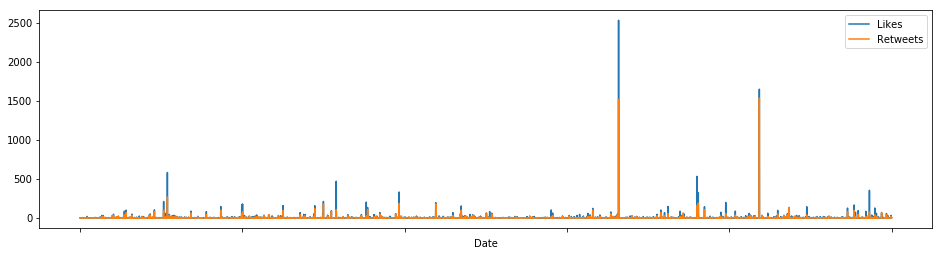

In [79]:
#Doing a time graph of favorite and retweet frequency
tfav = pd.Series(data=new_df['Likes'].values, index=new_df['Date'])
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret = pd.Series(data=new_df['RTs'].values, index=new_df['Date'])
tret.plot(figsize=(16,4), label="Retweets", legend=True)

In [61]:
# We obtain all possible sources:
sources = []
for source in new_df['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>
* <a href="http://resist.bot" rel="nofollow">RB Open Letters</a>
* <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
* <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
* <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
* <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
* <a href="http://bufferapp.com" rel="nofollow">Buffer</a>
* <a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>
* <a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>
* <a href="https://periscope.tv" rel="nofollow">Periscope</a>
* <a href="https://ifttt.com" rel="nofollow">IFTTT</a>
* <a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>
* <a href="http://dynamicsignal.com/" rel="nofollow">Dynamic Signal</a>
* <a href="http://instagram.com" r

AxesSubplot(0.125,0.125;0.775x0.755)


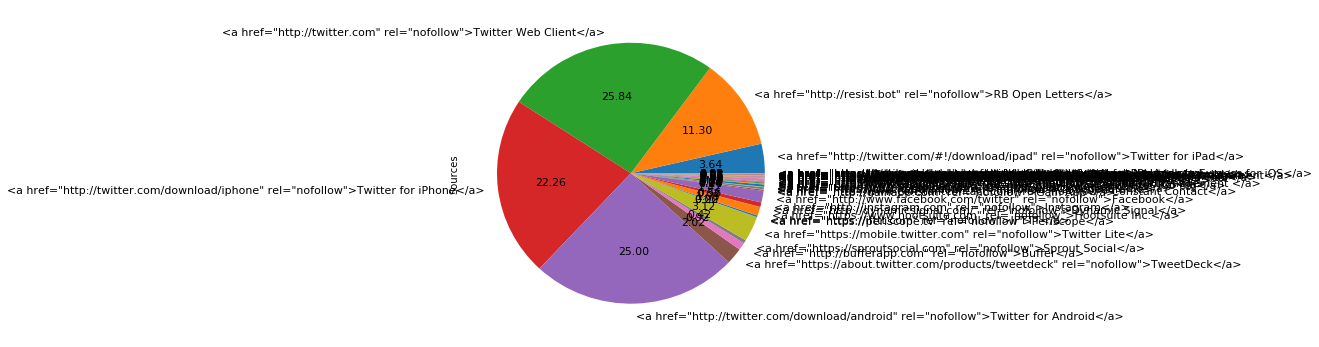

In [62]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in new_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
print(pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6)));

In [113]:
locations = []
for location in new_df['Location']:
    if location not in locations:
        locations.append(location)

# We print sources list:
#print("Creation of content locations:")
#for location in locations:
 #   print("* {}".format(location))

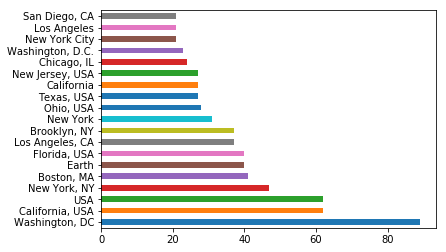

In [19]:
#20 top most locations of tweets in terms of cities. The 1st one is US so I changed the counts from 0:20 instead to 1:20
new_df['Location'].value_counts()[1:20].plot(kind='barh')

In [114]:
#Trying to plot these city in a map with a frequency count. Having issues to install basemap and geopy
#import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
#from geopy.geocoders import Nominatim
#import math
#Frequency = new_df['Location'].map(new_df.groupby('Location').size())
#cities = [new_df['Location'], Frequency]
#scale = 5

#map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
#        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
#map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
#geolocator = Nominatim()
#for (city,count) in cities:
#    loc = geolocator.geocode(city)
#    x, y = map(loc.longitude, loc.latitude)
#    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
#plt.show()

In [ ]:
#import sys
#!{sys.executable} -m pip install basemap #Putting the commands to install basemap.

In [115]:
#!pip install https://downloads.sourceforge.net/project/matplotlib/matplotlib-toolkits/basemap-1.0.7/basemap-1.0.7.tar.gz
    

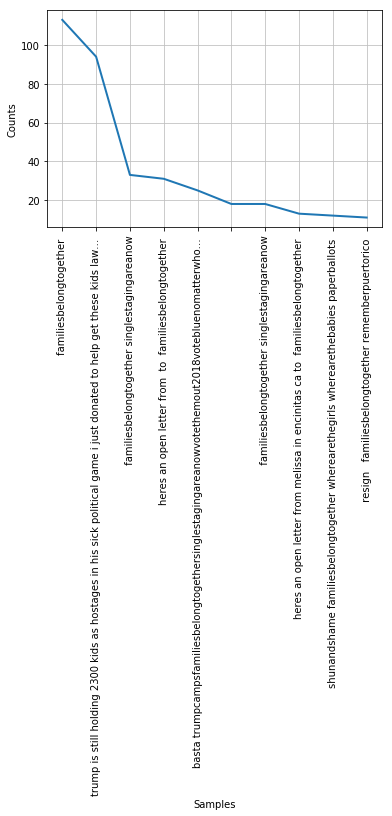

In [42]:
#This frequency distribution is shows the 10 tweets that had the higher counts in the list of 5000 tweets
from nltk import FreqDist
users = new_df['tweet']
fdist2 = FreqDist(users)
fdist2.plot(10)

In [110]:
#print(tweet).split()[0:50] - this splits each tweet as a string as opposed to having each word as a string per tweet stored in individual list

(-0.5, 799.5, 399.5, -0.5)

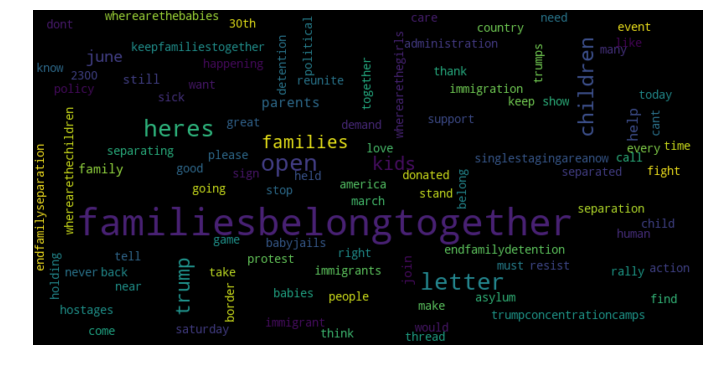

In [49]:
from nltk import sent_tokenize, word_tokenize, regexp_tokenize, FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


def tokenize(text, pat='(?u)\\b\\w\\w+\\b', stop_words='english', min_len=2):
    if stop_words:
        stop = set(stopwords.words(stop_words))
    return [w
            for w in regexp_tokenize(text.casefold(), pat)
            if w not in stop and len(w) >= min_len]

words = tokenize(bringfamiliestogether['text'].str.cat(sep=' '), min_len=4)

fdist = FreqDist(words)

wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(fdist)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [109]:
#import sys
#!{sys.executable} -m pip install WordCloud

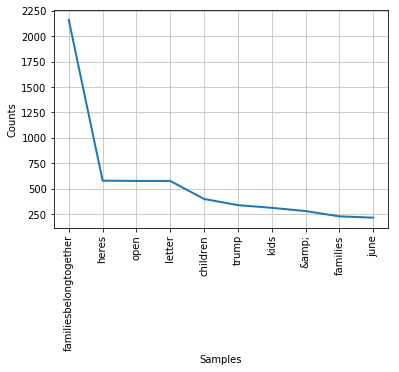

In [108]:
#To get frequency distribution of the common words from tweets (ignored stopwords)
from nltk.corpus import stopwords
stop = stopwords.words('english')
shorter_list = new_df['tweet'].str.split().apply(lambda x: [item for item in x if item not in stop]) #make a list of words with no stop words per each string
#print (shorter_list.sum())[0:50] #Check that by summing all the contents in the frame, the list will consist of all the words previously stored as a list per string
 
#Plot the frequency distribution of the words
shorter_list_freq= nltk.FreqDist(shorter_list.sum())
shorter_list_freq.plot(10)
